### Loading Libraries

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [267]:
churnData = pd.read_csv('DATA_Customer-churn.csv', index_col=0)

In [268]:
churnData

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,
Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No


### checking data type

In [269]:
churnData.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Converting Totalcharges to numeric

In [270]:
churnData['TotalCharges']=pd.to_numeric(churnData['TotalCharges'], errors= 'coerce')

In [271]:
churnData.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for and replacing Null values

In [272]:
churnData.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [273]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [274]:
churnData.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [275]:
churnData1= pd.DataFrame().assign(tenure=churnData['tenure'], SeniorCitizen=churnData['SeniorCitizen'],MonthlyCharges=churnData['MonthlyCharges'],TotalCharges=churnData['TotalCharges'],Churn=churnData['Churn'])
churnData1

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
gender,,,,,
Female,1,0,29.85,29.85,No
Male,34,0,56.95,1889.50,No
Male,2,0,53.85,108.15,Yes
Male,45,0,42.30,1840.75,No
Female,2,0,70.70,151.65,Yes
...,...,...,...,...,...
Male,24,0,84.80,1990.50,No
Female,72,0,103.20,7362.90,No
Female,11,0,29.60,346.45,No


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### xy split

In [277]:
x=churnData1.drop('Churn', axis=1)
y=churnData1.Churn

In [278]:
x

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
gender,,,,
Female,1,0,29.85,29.85
Male,34,0,56.95,1889.50
Male,2,0,53.85,108.15
Male,45,0,42.30,1840.75
Female,2,0,70.70,151.65
...,...,...,...,...
Male,24,0,84.80,1990.50
Female,72,0,103.20,7362.90
Female,11,0,29.60,346.45


In [279]:
### Another option could be convereting the y to dummies and then using it for the Logistic regression function

In [280]:
#y=pd.get_dummies(y, drop_first=True)
y

gender
Female     No
Male       No
Male      Yes
Male       No
Female    Yes
         ... 
Male       No
Female     No
Female     No
Male      Yes
Male       No
Name: Churn, Length: 7043, dtype: object

In [281]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.30, random_state=100)

In [282]:
std_scaler=StandardScaler().fit(x_train)
x_train_scaled=std_scaler.transform(x_train)
x_test_scaled=std_scaler.transform(x_test)

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.794726,0.780880
1,Precision,0.656958,0.624697
2,Recall,0.467383,0.455830


Confusion matrix for the train set
[[3309  318]
 [ 694  609]]


C:\Users\hp\anaconda3\envs\fabs\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


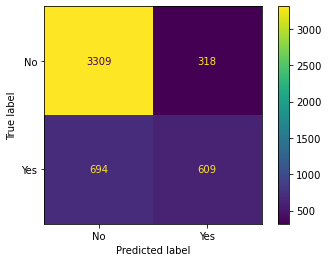



Confusion matrix for the test set
[[1392  155]
 [ 308  258]]


C:\Users\hp\anaconda3\envs\fabs\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


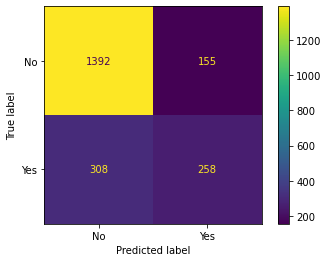

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

log_model.fit(x_train_scaled, y_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

y_pred_train_log = log_model.predict(x_train_scaled)
y_pred_test_log = log_model.predict(x_test_scaled)

recall_average = recall_score(y_test, y_pred_test_log, average="binary", pos_label='Yes')

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,x_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,x_test_scaled,y_test, values_format = 'd')
plt.show()

### KNN Classifier

In [284]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)               
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier # Import  KNeighborsRegressor to use the K-NN for regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #not needed for KNeighnorsClassifier

In [285]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

y_pred_train_knn = knn_model.predict(x_train_scaled)
y_pred_test_knn = knn_model.predict(x_test_scaled)